In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./data/titanic.csv')
df.sample(3) # Prueba de que se estan leyendo los datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S


In [4]:
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.")

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


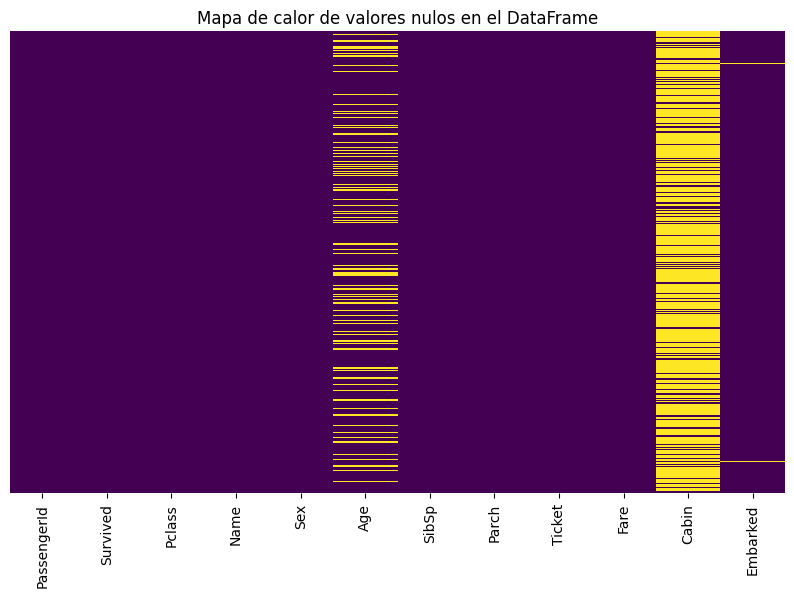

In [7]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el mapa de calor de valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Título del gráfico
plt.title('Mapa de calor de valores nulos en el DataFrame')

# Mostrar el gráfico
plt.show()

In [8]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().mean() * 100

# Redondear a 2 decimales y ordenar de mayor a menor
porcentaje_nulos = porcentaje_nulos.round(2).sort_values(ascending=False)

# Mostrar el resultado
print(porcentaje_nulos)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


C:\Users\FC-CE\AppData\Local\Temp\ipykernel_22800\416720313.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_nulos.index, y=total_nulos.values, palette='magma')


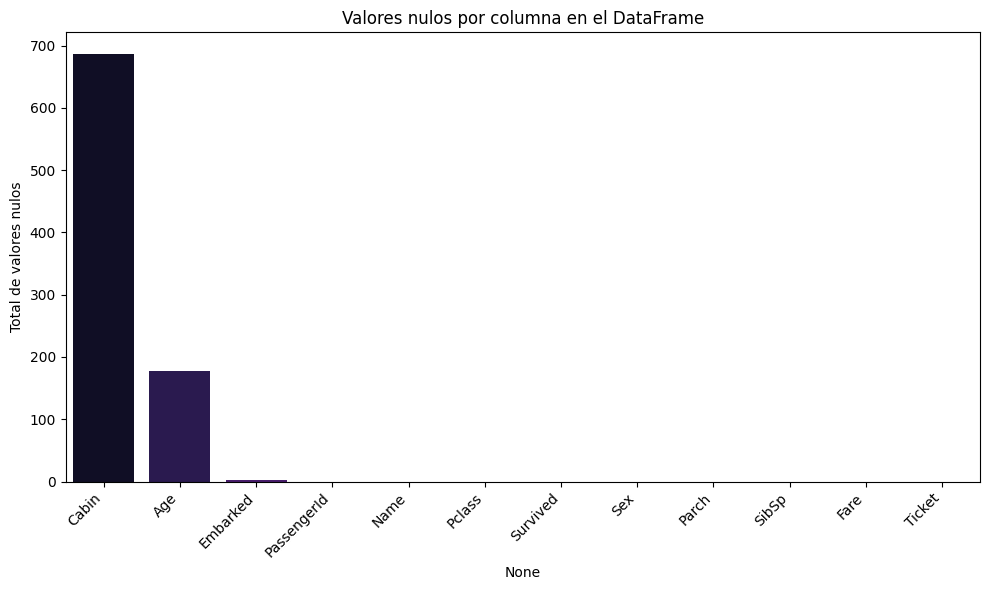

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el total de valores nulos por columna
total_nulos = df.isnull().sum().sort_values(ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=total_nulos.index, y=total_nulos.values, palette='magma')

# Personalizar el gráfico
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de valores nulos')
plt.title('Valores nulos por columna en el DataFrame')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [10]:
df.drop('Cabin', axis = 1, inplace = True) # Nos deshacemos de esta columna ya que no es practico tenerla al tener muchos valores nulls

In [12]:
# Calcular la mediana de la columna Age
median_age = df['Age'].median()

# Imputar los valores nulos con la mediana
df['Age'].fillna(median_age, inplace=True) # Rellenar los na (nulls) con la mediana, la media no es conveniente

C:\Users\FC-CE\AppData\Local\Temp\ipykernel_22800\1504321396.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True) # Rellenar los na (nulls) con la mediana, la media no es conveniente


In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # En embarked, llenamos los nulls con la moda, para limpiar

In [14]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2) # Revusanis ek oircebtahe de nulls

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [15]:
df.isnull().sum() # En vez de porcentajes, el total de nulls de cada columna

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.duplicated().sum() # Verificamos si tenemos filas repetidas

np.int64(0)

In [17]:
# Eliminamos mas columnas que no son relevantes para el analisis
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [18]:
# Checkpoint para no hacer este notebook tan grande, guardamos el dataset como _clean:
df.to_csv('./data/titanic_clean.csv', index=False)